# ACP et aide à l’interprétation
## 1. Importation des données actives

Dans un premier temps, nous importons le tableau des individus et variables actifs X (xij ; i =
1,…,n, nombre d’observations ; j = 1,…,p, nombre de variables) pour la construction des axes
factoriels

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [190]:
X_base = pd.read_excel("../data/01_raw/autos-acp.xls")
X = X_base.drop(["Modele", "V-MAX", "FINITION", "PRIX"], axis=1)

In [191]:
#dimension
print(X.shape) # (18, 6)

#nombre d'observations
n = X.shape[0]

#nombre de variables
p = X.shape[1]

#affichage des données
print(X)

(18, 6)
     CYL  PUISS  LONG  LARG  POIDS  R-POID.PUIS
0   1350     79   393   161    870    11.012658
1   1588     85   468   177   1110    13.058824
2   1294     68   424   168   1050    15.441176
3   1222     59   412   161    930    15.762712
4   1585     98   439   164   1105    11.275510
5   1297     82   429   169   1080    13.170732
6   1796     79   449   169   1160    14.683544
7   1565     55   424   163   1010    18.363636
8   2664    128   452   173   1320    10.312500
9   1166     55   399   157    815    14.818182
10  1570    109   428   162   1060     9.724771
11  1798     82   445   172   1160    14.146341
12  1998    115   469   169   1370    11.913043
13  1993     98   438   170   1080    11.020408
14  1442     80   431   166   1129    14.112500
15  1769     83   440   165   1095    13.192771
16  1979    100   459   173   1120    11.200000
17  1294     68   404   161    955    14.044118


## 2. Préparation des données
Nous devons explicitement centrer et réduire les variables pour réaliser une ACP normée avec PCA.
Nous utilisons la classe StandardScaler pour ce faire. 

In [192]:
#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676 -0.9986622 ]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142 -0.05615977]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062  1.04119704]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472  1.18930233]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542 -0.87758761]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654  -0.00461275]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146  0.69221734]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865  2.38733733]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359 -1.32116832]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281  0.75423393]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861 -1.59188757]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146  0.44477156]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363 -0.58392773]
 [ 0.99432805  0.67613189

In [193]:
#moyenne
print(np.mean(Z,axis=0))

#écart-type
print(np.std(Z,axis=0,ddof=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  2.15876699e-17]
[1. 1. 1. 1. 1. 1.]


## 3. Analyse en composantes principales avec PCA de scikit-learn

In [194]:
#instanciation
acp = PCA(svd_solver='full')

In [195]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


Le paramètre (svd_solver = ‘full’) indique l’algorithme utilisé pour la décomposition en
valeurs singulières. 

Nous choisissons la méthode ‘’exacte’’, sélectionnée de toute manière par
défaut pour l’appréhension des bases de taille réduite. 

D’autres approches sont disponibles pour le traitement des grands ensembles de données. 

Le nombre de composantes (K) n’étant pas spécifié (n_components = None), il est par défaut égal au nombre de variables (K = p)

In [196]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_) # 6

6


In [197]:
#variance expliquée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.22570779 1.10156695 0.35579296 0.22106634 0.0865704  0.00929557]


In [198]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.70428463 0.18359449 0.05929883 0.03684439 0.0144284  0.00154926]


La première composante accapare 73.68% de l’information disponible. Il y a un fort 'effet
taille’ dans nos données. Nous disposons de 87.94% avec les deux premiers
facteurs. Les suivants semblent anecdotiques.

Nous disposons des éléments permettant de construire le graphique 'Scree plot' (éboulis des
valeurs propres).

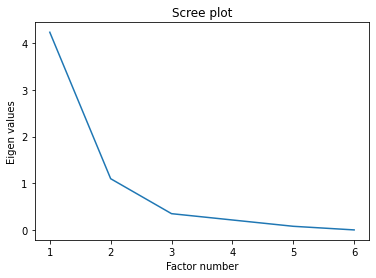

In [199]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Le graphique du cumul de variance restituée selon le nombre de facteurs peut être
intéressant également.

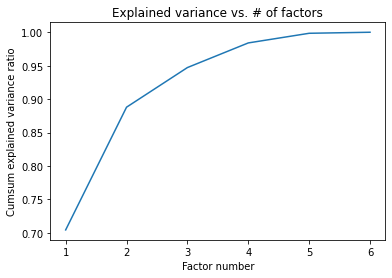

In [200]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

## 4. Détermination du nombre de facteur à retenir

Les 'cassures' dans les graphiques ci-dessus sont souvent évoquées (règle du coude) pour identifier le nombre de facteurs K* à retenir. 

La solution (K* = 2) semble s’imposer ici.

D’autres pistes existent pour répondre à cette question toujours délicate qui conditionne
l’interprétation de l’ACP, notamment le « test des bâtons brisés ».

In [201]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

Puis affichons conjointement les valeurs propres et les seuils :


In [202]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.225708  2.450000
1    1.101567  1.450000
2    0.355793  0.950000
3    0.221066  0.616667
4    0.086570  0.366667
5    0.009296  0.166667


Avec cette procédure, seul le premier facteur est valide. 

Le cercle des corrélations que nous construirons par la suite semble aller dans le même sens.

Néanmoins, nous choisissons K* = 2 pour pouvoir représenter les individus et les variables dans le plan.

## 5. Représentation des individus – Outils pour l’interprétation

### 5.1 Coordonnées factorielles. 

Les coordonnées factorielles des individus ont été collectées dans la variable coord. 

Nous les positionnons dans le premier plan factoriel avec leurs labels pour situer et comprendre les proximités entre les véhicules

NB : Les outils graphiques calculent souvent automatiquement les échelles en fonction des
plages de valeurs. 

Ce n’est pas une bonne idée en ce qui concerne l’ACP. 

En effet, les axes n’ont pas la même importance (% de variance restituée). 

Pour ne pas fausser la perception des proximités, il est très important de veiller à ce que les échelles soient
identiques en abscisse et en ordonnée. 

Respecter cette règle nous dispense de faire afficher les pourcentages de variance portés par les axes. 

Nous nous rendons compte directement dans notre graphique que les dispersions des individus sont nettement plus
marquées sur le premier axe, en abscisse.

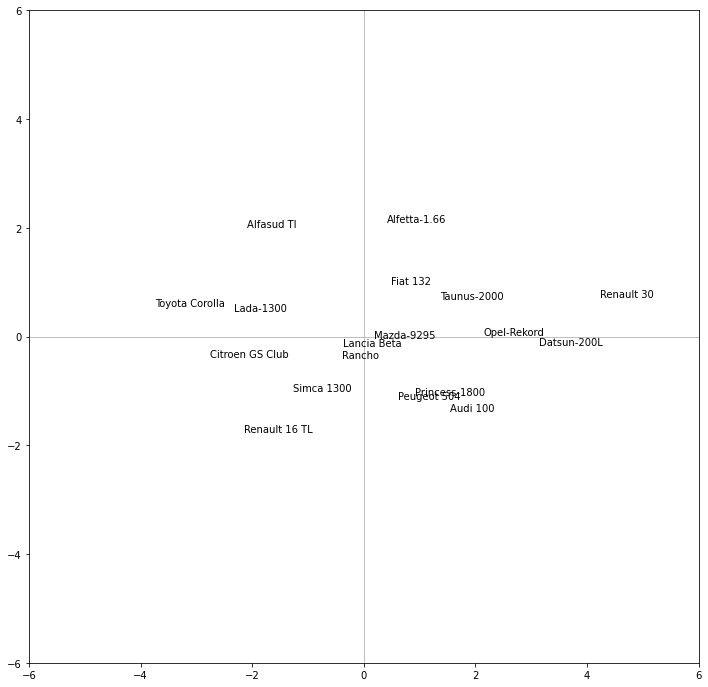

In [203]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X_base["Modele"][i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

## 5.2 Qualité de représentation – Les COS² (cosinus carré). 

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des
distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale.

In [204]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X_base["Modele"],'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.897875
1          Audi 100   6.655601
2        Simca 1300   2.960298
3   Citroen GS Club   7.814084
4          Fiat 132   1.614657
5       Lancia Beta   1.113664
6       Peugeot 504   1.860497
7     Renault 16 TL   8.936236
8        Renault 30  20.145396
9    Toyota Corolla  14.459043
10     Alfetta-1.66   4.982030
11    Princess-1800   2.149780
12      Datsun-200L  11.432288
13      Taunus-2000   2.896666
14           Rancho   0.683103
15       Mazda-9295   0.359925
16      Opel-Rekord   5.358475
17        Lada-1300   5.680383


Concrètement, la Renault 30 et la Toyota Corolla sont les deux véhicules qui se démarquent
le plus des autres, et on les retrouve aux deux extrémités du premier axe factoriel qui porte
73.68% de l’information disponible 

In [205]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X_base["Modele"],'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                 id    COS2_1    COS2_2
0        Alfasud TI  0.493568  0.455511
1          Audi 100  0.360167  0.281680
2        Simca 1300  0.538971  0.343602
3   Citroen GS Club  0.975297  0.018098
4          Fiat 132  0.153129  0.578910
5       Lancia Beta  0.118624  0.030487
6       Peugeot 504  0.207894  0.720126
7     Renault 16 TL  0.512628  0.348459
8        Renault 30  0.888384  0.026584
9    Toyota Corolla  0.963119  0.021257
10     Alfetta-1.66  0.034418  0.888320
11    Princess-1800  0.386059  0.547131
12      Datsun-200L  0.860836  0.002373
13      Taunus-2000  0.644980  0.159623
14           Rancho  0.220440  0.236814
15       Mazda-9295  0.093650  0.002278
16      Opel-Rekord  0.862532  0.000067
17        Lada-1300  0.945436  0.039114


Conformément à la théorie, pour chaque individu, la somme des COS² sur l’ensemble des
facteurs est égale à 1.

In [206]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 5.3 Contribution des individus aux axes (CTR).

Elles permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur

In [207]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X_base["Modele"],'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057738  0.204410
1          Audi 100  0.031515  0.094550
2        Simca 1300  0.020976  0.051299
3   Citroen GS Club  0.100194  0.007132
4          Fiat 132  0.003251  0.047142
5       Lancia Beta  0.001737  0.001712
6       Peugeot 504  0.005085  0.067570
7     Renault 16 TL  0.060226  0.157045
8        Renault 30  0.235290  0.027009
9    Toyota Corolla  0.183083  0.015501
10     Alfetta-1.66  0.002254  0.223199
11    Princess-1800  0.010911  0.059320
12      Datsun-200L  0.129384  0.001368
13      Taunus-2000  0.024563  0.023319
14           Rancho  0.001980  0.008158
15       Mazda-9295  0.000443  0.000041
16      Opel-Rekord  0.060764  0.000018
17        Lada-1300  0.070605  0.011206


Sans surprises, ce sont la Renault 30 et la Toyota Corolla qui sont déterminants pour le
premier axe ; 

pour le second, nous avons l’Alfetta-1.66, l’Alfasud TI et l’Audi 100.

Les sommes en ligne sont égales à l’unité ici :

In [208]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


## 6. Représentation des variables – Outils pour l’aide à l’interprétation

Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le
champ .components_.

In [209]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.43144898  0.4382007   0.42961187  0.39035852  0.44335893 -0.29718453]
 [ 0.03103726  0.39390974 -0.35483203 -0.39737155 -0.20775137 -0.71895845]
 [-0.54635753 -0.08327605  0.17193835  0.6181932  -0.3595677  -0.39184689]
 [-0.68264415  0.19179511  0.31955703 -0.38556977  0.49626326 -0.01239491]
 [-0.18542919  0.13433178 -0.74686559  0.3913198   0.47995277  0.07922713]
 [-0.11830001  0.76879774  0.00633745  0.07588153 -0.39287583  0.48456738]]


Attention, les facteurs sont en ligne, les variables en colonne. 

Nous devons en tenir compte pour obtenir les corrélations (variables x facteurs, 𝑟𝑗𝑘) en les multipliant par la racine carrée des valeurs propres :

In [210]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 8.86909244e-01  3.25753309e-02 -3.25893432e-01 -3.20963528e-01
  -5.45585483e-02 -1.14057203e-02]
 [ 9.00788426e-01  4.13430173e-01 -4.96728152e-02  9.01776354e-02
   3.95242343e-02  7.41224980e-02]
 [ 8.83132785e-01 -3.72415940e-01  1.02558445e-01  1.50248343e-01
  -2.19749130e-01  6.11016062e-04]
 [ 8.02441518e-01 -4.17063538e-01  3.68742250e-01 -1.81286009e-01
   1.15137430e-01  7.31600576e-03]
 [ 9.11391958e-01 -2.18046611e-01 -2.14476318e-01  2.33331532e-01
   1.41215774e-01 -3.78785427e-02]
 [-6.10908165e-01 -7.54586863e-01 -2.33730334e-01 -5.82779991e-03
   2.33108778e-02  4.67188475e-02]]


Les variables sont maintenant en ligne, les facteurs en colonne.

Si l’on s’en tient spécifiquement aux deux premiers facteurs :

In [211]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

            id     COR_1     COR_2
0          CYL  0.886909  0.032575
1        PUISS  0.900788  0.413430
2         LONG  0.883133 -0.372416
3         LARG  0.802442 -0.417064
4        POIDS  0.911392 -0.218047
5  R-POID.PUIS -0.610908 -0.754587


Nous pouvons dessiner maintenant le cercle des corrélations

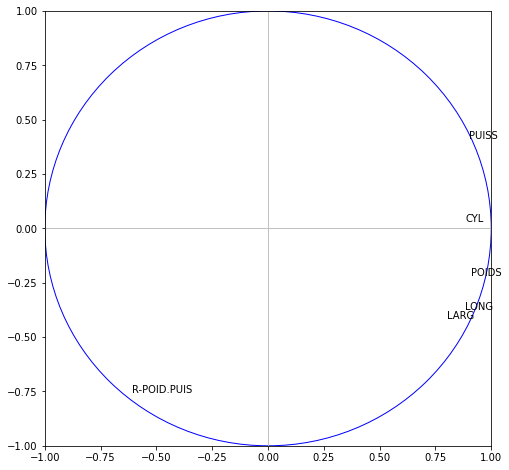

In [212]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

On perçoit clairement l’effet taille sur le premier axe :

les voitures puissantes et rapides sont
aussi les plus lourdes et imposantes, la relation globale entre les variables est en réalité
déterminée par la cylindrée (CYL)

## 6.1 Qualité de représentation des variables (COS²). 

On peut calculer la qualité de
représentation des variables en montant la corrélation au carré.

In [213]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

            id    COS2_1    COS2_2
0          CYL  0.786608  0.001061
1        PUISS  0.811420  0.170925
2         LONG  0.779924  0.138694
3         LARG  0.643912  0.173942
4        POIDS  0.830635  0.047544
5  R-POID.PUIS  0.373209  0.569401


Contribution des variables aux axes (CTR). La contribution est également basée sur le
carré de la corrélation, mais relativisée par l’importance de l’axe

In [215]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

            id     CTR_1     CTR_2
0          CYL  0.044051  0.000874
1        PUISS  0.045441  0.140858
2         LONG  0.043677  0.114297
3         LARG  0.036060  0.143345
4        POIDS  0.046517  0.039181
5  R-POID.PUIS  0.020900  0.469242
